In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [13]:
# Load CSV
df = pd.read_csv("iris.csv")

# Check actual column names
print("Columns in dataset:", df.columns)

# Standardize the target column to 'species'
possible_targets = ['species', 'Species', 'class', 'Class']
for col in possible_targets:
    if col in df.columns:
        df.rename(columns={col: 'species'}, inplace=True)
        break

df.head()


Columns in dataset: Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


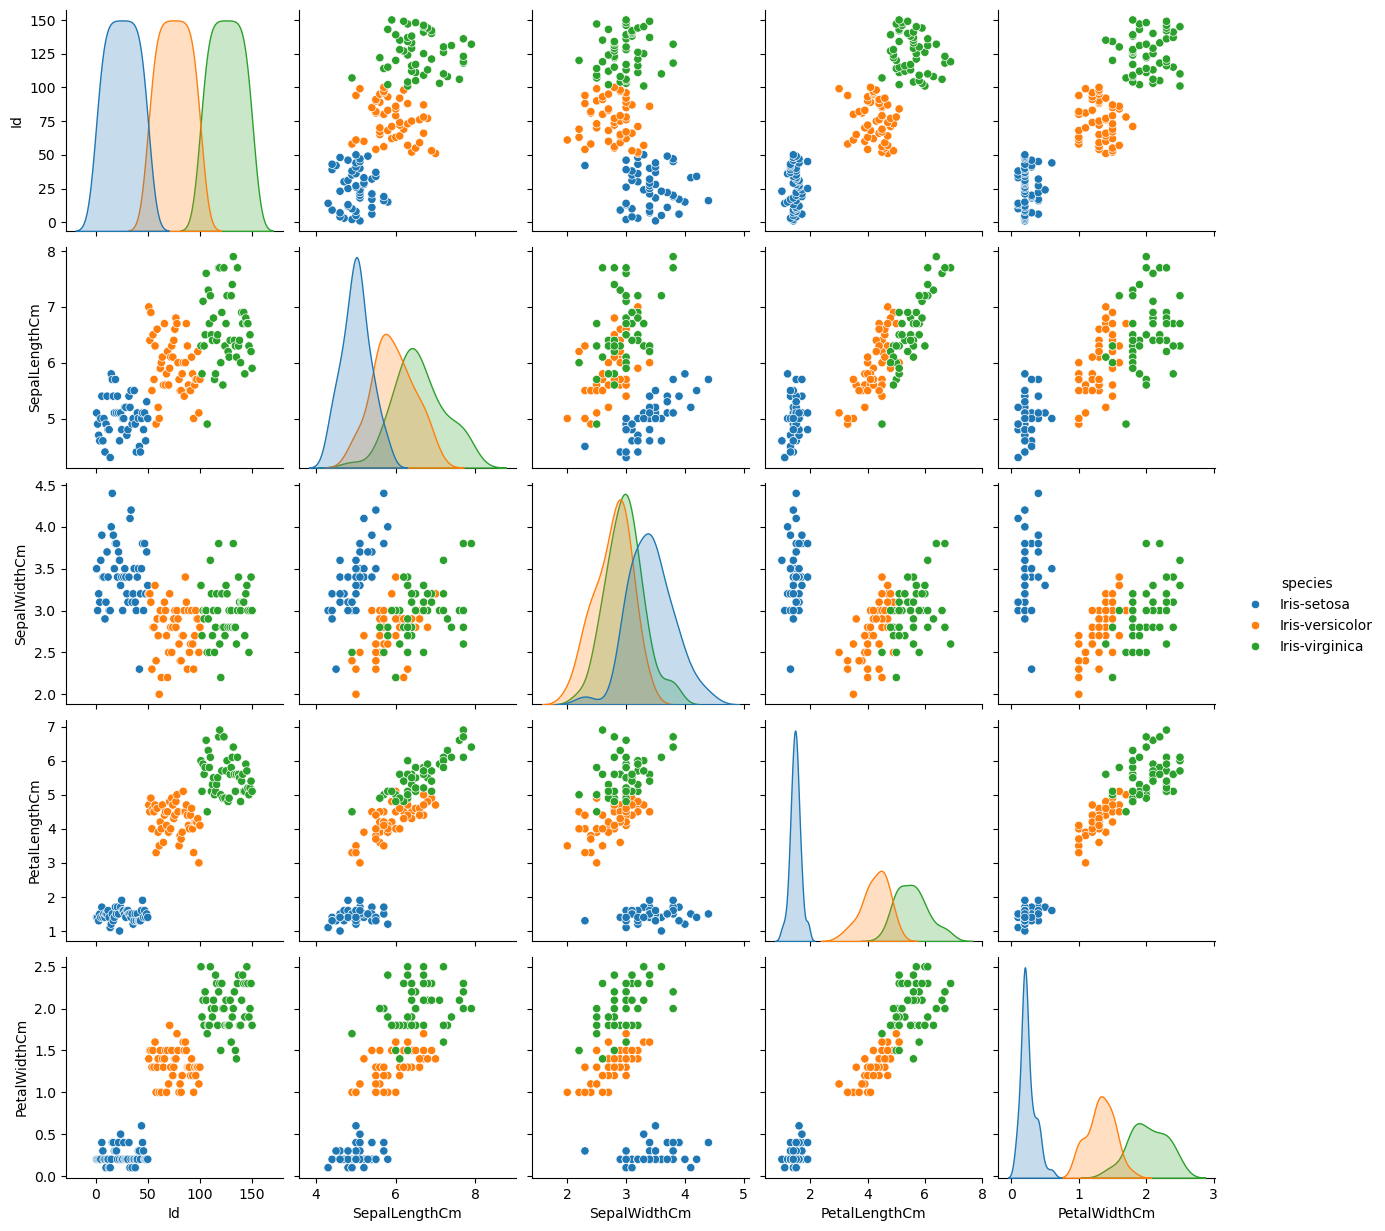

In [14]:
df['species'].value_counts()
sns.pairplot(df, hue='species')
plt.show()


In [15]:
# Separate features and target
X = df.drop('species', axis=1)
y = df['species']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [16]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


Logistic Regression Accuracy: 1.0


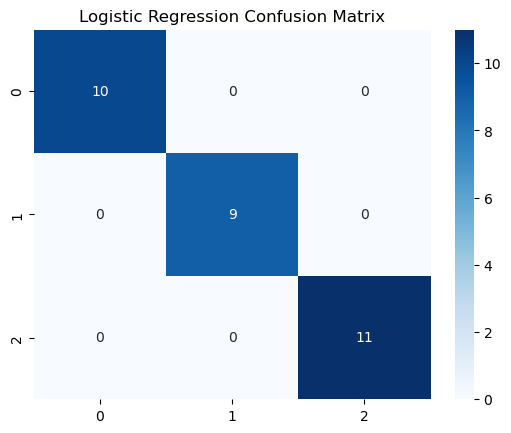

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [17]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Classification report
print(classification_report(y_test, y_pred_lr))


In [18]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


Random Forest Accuracy: 1.0


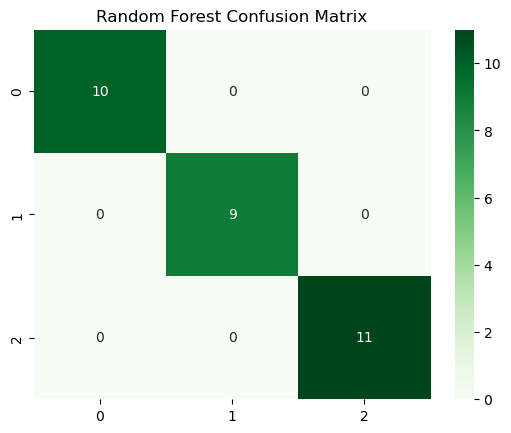

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [19]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.show()

# Classification report
print(classification_report(y_test, y_pred_rf))


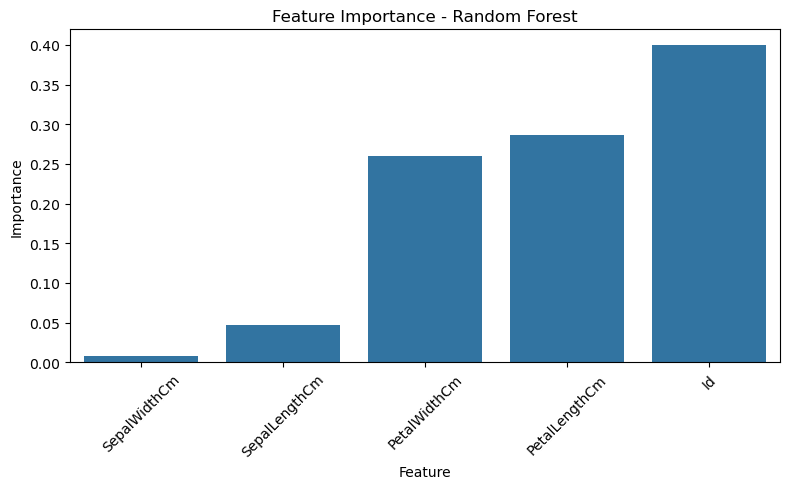

In [20]:
importances = rf_model.feature_importances_
features = X.columns

feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(8,5))
sns.barplot(x='Feature', y='Importance', data=feature_df)
plt.xticks(rotation=45)
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()


In [21]:
print("Conclusion:")
print("- Both Logistic Regression and Random Forest achieve high accuracy on Iris dataset.")
print("- Random Forest slightly better captures complex feature relationships.")
print("- Most important features according to Random Forest:", feature_df['Feature'].tail(2).values)


Conclusion:
- Both Logistic Regression and Random Forest achieve high accuracy on Iris dataset.
- Random Forest slightly better captures complex feature relationships.
- Most important features according to Random Forest: ['PetalLengthCm' 'Id']
